<a href="https://colab.research.google.com/github/Tommy199665/Sensen/blob/main/%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E6%8A%80%E8%A1%93%E5%88%86%E6%9E%902018_2019(%E7%96%AB%E6%83%85%E5%89%8D)ETF0050KD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mplfinance

     |████████████████████████████████| 70 kB 5.5 MB/s 


In [ ]:
pip install TA-Lib
# ERROR: Failed building wheel for TA-Lib

SyntaxError: ignored

Colab安裝Talib的解法
https://hackmd.io/@wiimax/S1VGctnSS

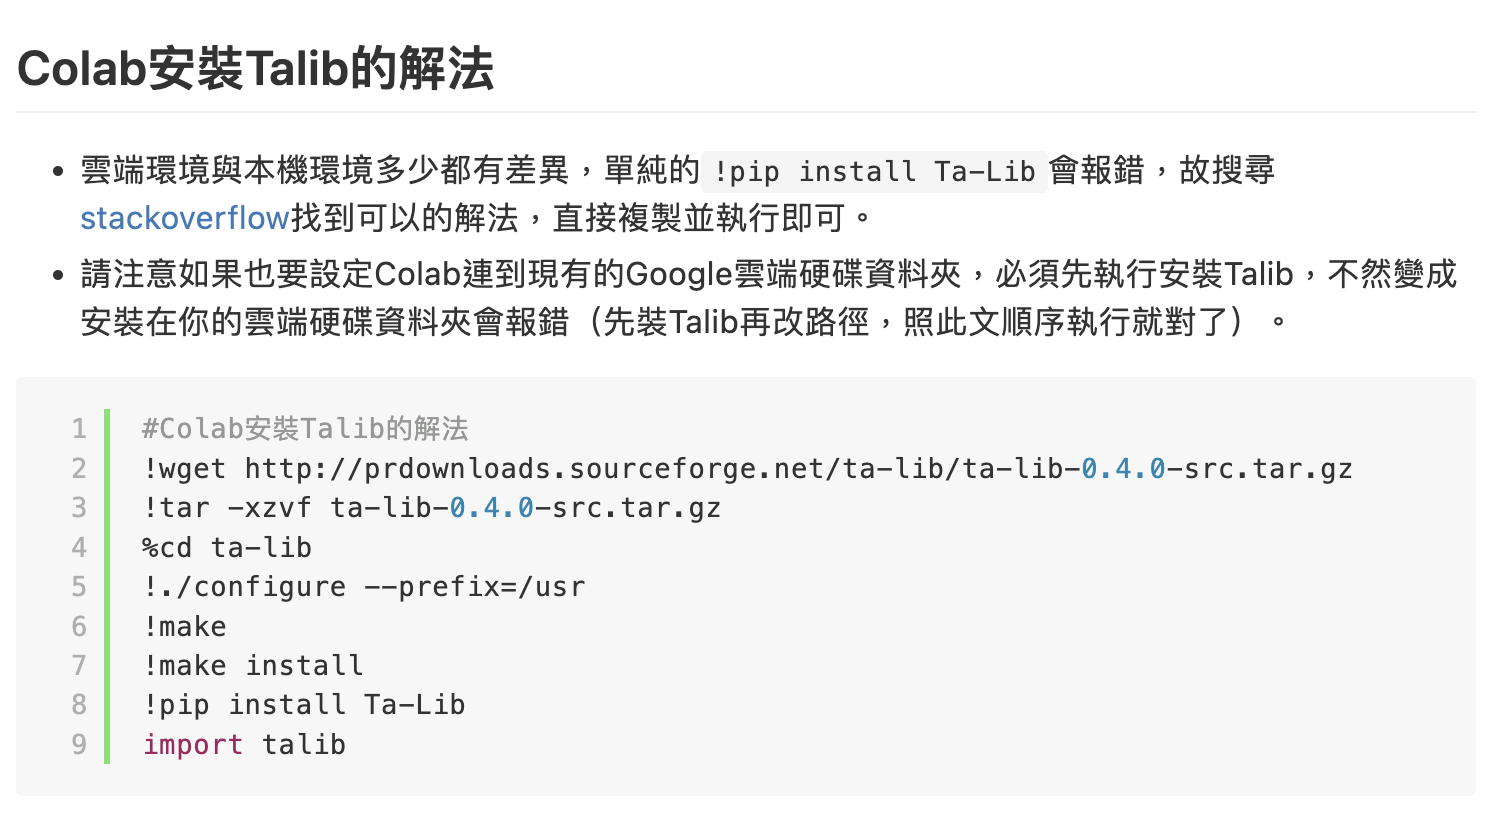

In [ ]:
#Colab安裝Talib的解法
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
# 2 分鐘 31 秒 完成時間：下午8:14

In [ ]:
import requests
import pandas as pd
from io import StringIO
import datetime
import os
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline
import talib
import numpy as np

/content/drive/MyDrive/Colab Notebooks/data/201801-201905 0050.TW.csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/STOCK_DAY_9943_202201 - STOCK_DAY_9943_202201.csv",index_col = "Date")
df = df.loc['2022/01/01':]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022/01/03,60.4,60.4,60.2,60.3,60.3,124
2022/01/04,60.3,60.5,60.2,60.3,60.3,116
2022/01/05,60.3,60.3,60.1,60.2,60.2,105
2022/01/06,60.1,60.2,60.0,60.1,60.1,166
2022/01/07,60.1,60.2,59.9,60.0,60.0,208
2022/01/10,60.0,60.0,59.6,59.6,59.6,369
2022/01/11,59.6,59.6,59.3,59.4,59.4,477
2022/01/12,59.4,59.4,59.0,59.2,59.2,247
2022/01/13,59.3,59.3,59.0,59.1,59.1,171


In [ ]:
np.any(pd.isnull(df))

False

https://augustime.com/stochastic-oscillator/

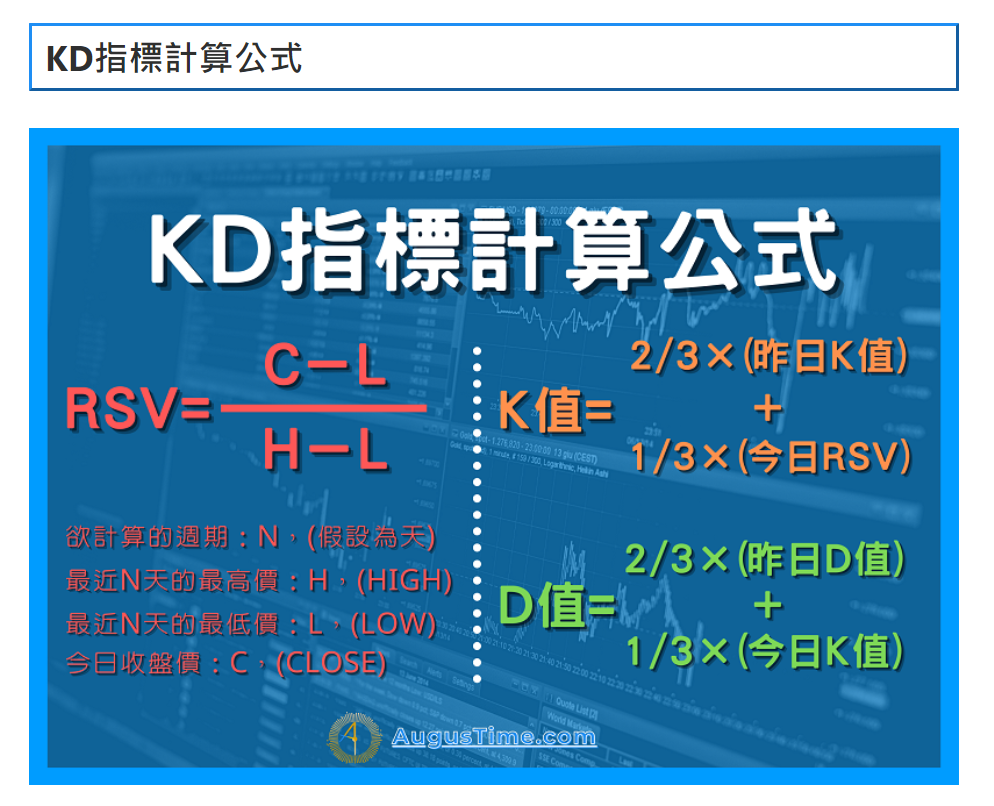

#KD指標最常用的週期為(9,3,3)，但Ta-lib中預設為(5,3,3)，
所以fastk_period我們要設定為9，而slowk_matype跟slowd_matype是平滑的種類，通常我們設為1

In [ ]:
df["K"],df["D"] = talib.STOCH(df['High'], 
                              df['Low'], 
                              df['Close'], 
                              fastk_period=9,
                              slowk_period=3,
                              slowk_matype=1,
                              slowd_period=3,
                              slowd_matype=1)
#KD指標最常用的週期為(9,3,3)，但Ta-lib中預設為(5,3,3)，所以fastk_period我們要設定為9，而slowk_matype跟slowd_matype是平滑的種類，通常我們設為1
df

,Open,High,Low,Close,Adj Close,Volume,K,D
Date,,,,,,,,
2022/01/03,60.4,60.4,60.2,60.3,60.3,124,NaN,NaN
2022/01/04,60.3,60.5,60.2,60.3,60.3,116,NaN,NaN
2022/01/05,60.3,60.3,60.1,60.2,60.2,105,NaN,NaN
2022/01/06,60.1,60.2,60.0,60.1,60.1,166,NaN,NaN
2022/01/07,60.1,60.2,59.9,60.0,60.0,208,NaN,NaN
2022/01/10,60.0,60.0,59.6,59.6,59.6,369,NaN,NaN
2022/01/11,59.6,59.6,59.3,59.4,59.4,477,NaN,NaN
2022/01/12,59.4,59.4,59.0,59.2,59.2,247,NaN,NaN
2022/01/13,59.3,59.3,59.0,59.1,59.1,171,NaN,NaN


#shift : shift就是位移的意思，1為向下位移1格，-1為向上位移1格，以此類推
原因：

In [ ]:
df["B_K"] = df["K"].shift(1)
df["B_D"] = df["D"].shift(1) #shift : shift就是位移的意思，1為向下位移1格，-1為向上位移1格，以此類推
df.tail()

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D
Date,,,,,,,,,,
2022/04/20,56.2,56.3,55.8,55.9,55.9,89,53.230627,47.656116,48.127920,42.081605
2022/04/21,56.0,56.2,55.9,56.1,56.1,106,59.948647,53.802381,53.230627,47.656116
2022/04/22,56.1,56.1,55.5,56.0,56.0,82,61.224323,57.513352,59.948647,53.802381
2022/04/25,55.8,56.0,55.5,55.6,55.6,104,53.528828,55.521090,61.224323,57.513352
2022/04/26,56.0,56.2,55.6,56.2,56.2,74,60.097748,57.809419,53.528828,55.521090


# 計算進場時機
原因： df["B_K"][i] < df["B_D"][i] and df["K"][i] > df["D"][i]

df["B_K"][i] < df["B_D"][i] and df["K"][i] > df["D"][i]

In [ ]:
buy = []
for i in range(len(df)):
    if df["B_K"][i] < df["B_D"][i] and df["K"][i] > df["D"][i]:
        buy.append(1)
    else:
        buy.append(0)
df["buy"] = buy
buy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy
Date,,,,,,,,,,,
2022/01/03,60.4,60.4,60.2,60.3,60.3,124,NaN,NaN,NaN,NaN,0
2022/01/04,60.3,60.5,60.2,60.3,60.3,116,NaN,NaN,NaN,NaN,0
2022/01/05,60.3,60.3,60.1,60.2,60.2,105,NaN,NaN,NaN,NaN,0
2022/01/06,60.1,60.2,60.0,60.1,60.1,166,NaN,NaN,NaN,NaN,0
2022/01/07,60.1,60.2,59.9,60.0,60.0,208,NaN,NaN,NaN,NaN,0
2022/01/10,60.0,60.0,59.6,59.6,59.6,369,NaN,NaN,NaN,NaN,0
2022/01/11,59.6,59.6,59.3,59.4,59.4,477,NaN,NaN,NaN,NaN,0
2022/01/12,59.4,59.4,59.0,59.2,59.2,247,NaN,NaN,NaN,NaN,0
2022/01/13,59.3,59.3,59.0,59.1,59.1,171,NaN,NaN,NaN,NaN,0


# 顯示所有的欄位與資料

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy
Date,,,,,,,,,,,
2022/01/03,60.4,60.4,60.2,60.3,60.3,124,NaN,NaN,NaN,NaN,0
2022/01/04,60.3,60.5,60.2,60.3,60.3,116,NaN,NaN,NaN,NaN,0
2022/01/05,60.3,60.3,60.1,60.2,60.2,105,NaN,NaN,NaN,NaN,0
2022/01/06,60.1,60.2,60.0,60.1,60.1,166,NaN,NaN,NaN,NaN,0
2022/01/07,60.1,60.2,59.9,60.0,60.0,208,NaN,NaN,NaN,NaN,0
2022/01/10,60.0,60.0,59.6,59.6,59.6,369,NaN,NaN,NaN,NaN,0
2022/01/11,59.6,59.6,59.3,59.4,59.4,477,NaN,NaN,NaN,NaN,0
2022/01/12,59.4,59.4,59.0,59.2,59.2,247,NaN,NaN,NaN,NaN,0
2022/01/13,59.3,59.3,59.0,59.1,59.1,171,NaN,NaN,NaN,NaN,0


# 取出買進日期 buy 等於1

In [ ]:
df.loc[df["buy"].isin([1])]

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy
Date,,,,,,,,,,,
2022/01/21,59.1,59.3,59.0,59.2,59.2,106,29.287995,27.618880,25.242657,25.949765,1
2022/02/07,59.1,59.8,58.9,59.5,59.5,113,43.080500,32.262179,16.160999,21.443859,1
2022/02/18,60.8,61.9,60.8,61.6,61.6,369,84.779154,84.199161,82.058307,83.619169,1
2022/03/03,60.8,61.0,60.7,61.0,61.0,81,30.363280,30.085986,25.012274,29.808693,1
2022/03/10,59.6,60.1,59.6,59.8,59.8,84,16.086840,13.776333,8.364155,11.465827,1
2022/03/15,59.5,59.5,59.0,59.5,59.5,210,20.428222,18.393786,15.856444,16.359351,1
2022/03/30,57.3,58.9,57.1,58.9,58.9,397,39.000489,30.714497,14.667644,22.428505,1
2022/04/14,54.9,56.0,54.8,55.6,55.6,147,18.010375,13.403511,7.073381,8.796648,1
2022/04/26,56.0,56.2,55.6,56.2,56.2,74,60.097748,57.809419,53.528828,55.521090,1


# 計算賣出時機：
df["B_K"][i] > df["B_D"][i] and df["K"][i] < df["D"][i]

In [ ]:
sell = []
for i in range(len(df)):
    if df["B_K"][i] > df["B_D"][i] and df["K"][i] < df["D"][i]:
        sell.append(-1)
    else:
        sell.append(0)
df["sell"] = sell
sell

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -1,
 0]

# 找出賣出日期

In [ ]:
df.loc[df["sell"].isin([-1])]

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy,sell
Date,,,,,,,,,,,,
2022/01/20,59.2,59.3,59.0,59.1,59.1,83,25.242657,25.949765,32.303495,26.656873,0,-1
2022/01/25,59.0,59.1,58.9,58.9,58.9,120,22.321999,26.726719,34.643997,31.131439,0,-1
2022/02/17,60.8,61.5,60.5,60.8,60.8,327,82.058307,83.619169,91.039691,85.180031,0,-1
2022/02/21,61.6,61.6,60.7,61.2,61.2,217,73.968524,79.083843,84.779154,84.199161,0,-1
2022/03/04,61.0,61.0,60.8,60.8,60.8,50,28.818004,29.451995,30.363280,30.085986,0,-1
2022/03/14,59.8,59.9,59.5,59.5,59.5,75,15.856444,16.359351,19.948182,16.862258,0,-1
2022/03/23,59.0,59.0,57.1,58.3,58.3,940,58.015633,62.824810,74.651955,67.633987,0,-1
2022/04/01,57.8,57.8,57.4,57.5,57.5,129,25.583455,29.095413,34.500244,32.607370,0,-1
2022/04/25,55.8,56.0,55.5,55.6,55.6,104,53.528828,55.521090,61.224323,57.513352,0,-1


# 標記買進的日期以紅色三角形標示：

In [ ]:
buy_mark = []
for i in range(len(df)):
    if df["buy"][i] == 1:
        buy_mark.append(df["High"][i] + 3) # 高度加3
    else:
        buy_mark.append(np.nan)
df["buy_mark"] = buy_mark
buy_mark

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 62.3,
 nan,
 nan,
 nan,
 62.8,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 64.9,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 64.0,
 nan,
 nan,
 nan,
 nan,
 63.1,
 nan,
 nan,
 62.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 61.9,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 59.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 59.2]

# 標記賣出的日期以綠色三角形標示：

In [ ]:
sell_mark = []
for i in range(len(df)):
    if df["sell"][i] == -1:
        sell_mark.append(df["Low"][i] - 3)
    else:
        sell_mark.append(np.nan)
df["sell_mark"] = sell_mark
sell_mark

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 56.0,
 nan,
 nan,
 55.9,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 57.5,
 nan,
 57.7,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 57.8,
 nan,
 nan,
 nan,
 nan,
 nan,
 56.5,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 54.1,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 54.4,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 52.5,
 nan]

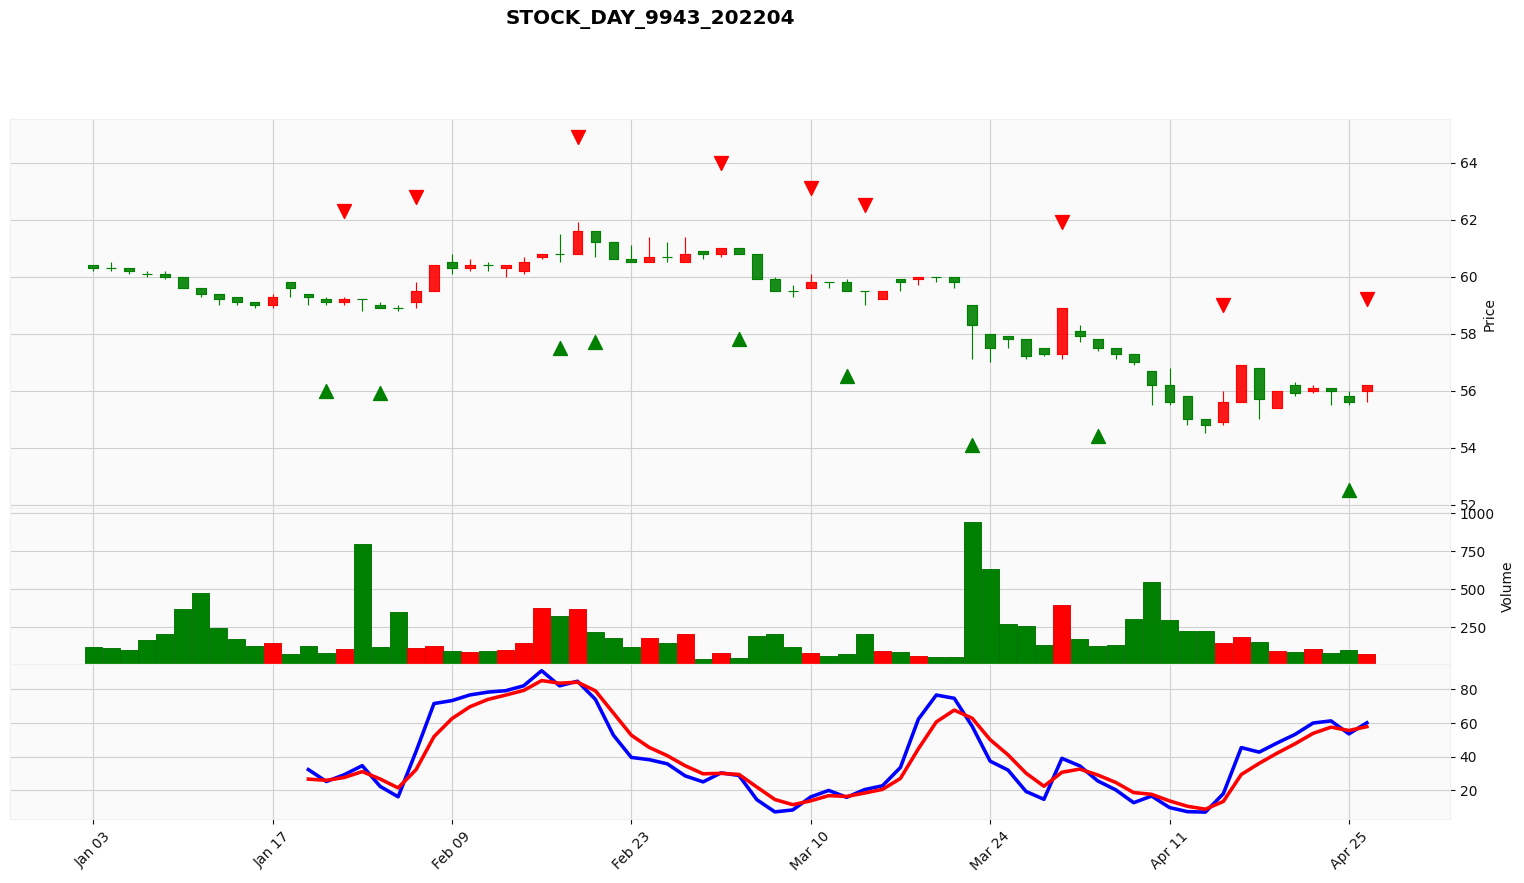

In [ ]:
df.index = pd.DatetimeIndex(df.index)
stock_id = "STOCK_DAY_9943_202204"
mc = mpf.make_marketcolors(up='r', down='g', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)
add_plot =[mpf.make_addplot(df["buy_mark"],scatter=True, markersize=100, marker='v', color='r'),
           mpf.make_addplot(df["sell_mark"],scatter=True, markersize=100, marker='^', color='g'),
           mpf.make_addplot(df["K"],panel= 2,color="b"),
           mpf.make_addplot(df["D"],panel= 2,color="r")]
kwargs = dict(type='candle', volume = True,figsize=(20, 10),title = stock_id, style=s,addplot=add_plot)
mpf.plot(df, **kwargs)

# 計算買進賣出次數 : 
- buy1
- sell1

In [ ]:
buy1 = df.loc[df["buy"].isin([1])]
sell1 = df.loc[df["sell"].isin([-1])]
print("買進次數 : " + str(len(buy1)) + "次")
print("賣出次數 : " + str(len(sell1)) + "次")

買進次數 : 9次
賣出次數 : 9次


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy,sell,buy_mark,sell_mark
Date,,,,,,,,,,,,,,
2022-01-03,60.4,60.4,60.2,60.3,60.3,124,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-04,60.3,60.5,60.2,60.3,60.3,116,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-05,60.3,60.3,60.1,60.2,60.2,105,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-06,60.1,60.2,60.0,60.1,60.1,166,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-07,60.1,60.2,59.9,60.0,60.0,208,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-10,60.0,60.0,59.6,59.6,59.6,369,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-11,59.6,59.6,59.3,59.4,59.4,477,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-12,59.4,59.4,59.0,59.2,59.2,247,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2022-01-13,59.3,59.3,59.0,59.1,59.1,171,NaN,NaN,NaN,NaN,0,0,NaN,NaN


# 最後一天無條件售出對:

In [ ]:
sell1 = sell1.append(df[-1:])
sell1.tail()

,Open,High,Low,Close,Adj Close,Volume,K,D,B_K,B_D,buy,sell,buy_mark,sell_mark
Date,,,,,,,,,,,,,,
2022-03-14,59.8,59.9,59.5,59.5,59.5,75,15.856444,16.359351,19.948182,16.862258,0,-1,NaN,56.5
2022-03-23,59.0,59.0,57.1,58.3,58.3,940,58.015633,62.824810,74.651955,67.633987,0,-1,NaN,54.1
2022-04-01,57.8,57.8,57.4,57.5,57.5,129,25.583455,29.095413,34.500244,32.607370,0,-1,NaN,54.4
2022-04-25,55.8,56.0,55.5,55.6,55.6,104,53.528828,55.521090,61.224323,57.513352,0,-1,NaN,52.5
2022-04-26,56.0,56.2,55.6,56.2,56.2,74,60.097748,57.809419,53.528828,55.521090,1,0,59.2,NaN


# 計算投報率:

In [ ]:
return_rate = []
for i in range(len(buy1)):
    rate = round((sell1["Adj Close"][i] - buy1["Adj Close"][i]) / buy1["Adj Close"][i] * 100,2)
    return_rate.append(rate)
return_rate

[-0.17, -1.01, -1.3, 0.33, 1.67, 0.0, -1.02, 3.42, -1.07]

# 找出最高報酬率以及最低報酬率:

In [ ]:
return_all = sorted(return_rate,reverse=True)
print("該策略最高報酬為 : " + str(return_all[0]) + " %")
print("該策略最低報酬為 : " + str(return_all[-1]) + " %")
return_all

該策略最高報酬為 : 3.42 %
該策略最低報酬為 : -1.3 %


[3.42, 1.67, 0.33, 0.0, -0.17, -1.01, -1.02, -1.07, -1.3]

# 計算勝率以及獲利次數虧損次數總交易次數等資料:
- 總獲利次數 :
- 總虧損次數 :
- 總交易次數 : 
- 勝率為 :

In [ ]:
win = len([i for i in return_rate if i > 0])
lose = len([i for i in return_rate if i <= 0])
sum_t = len(return_rate)
print("總獲利次數 : " + str(win) + "次")
print("總虧損次數 : " + str(lose) + "次")
print("總交易次數 : " + str(win + lose) + "次")
print("勝率為 : " + str(round(win / sum_t*100,2)) + "%")

總獲利次數 : 3次
總虧損次數 : 6次
總交易次數 : 9次
勝率為 : 33.33%


# 計算總報酬率與單次平均報酬:
- 該策略總報酬為 :-4.93%
- 該策略平均每次報酬為 : -0.12%

In [ ]:
cum_return = [0]
for i in range(len(return_rate)):
    cum = round(return_rate[i] + cum_return[i],2)
    cum_return.append(cum)
print("該策略總報酬為 :" + str(cum_return[-1]) + "%")
print("該策略平均每次報酬為 : " + str(round(cum_return[-1]/(win + lose),2)) + "%")
cum_return

該策略總報酬為 :0.85%
該策略平均每次報酬為 : 0.09%


[0, -0.17, -1.18, -2.48, -2.15, -0.48, -0.48, -1.5, 1.92, 0.85]

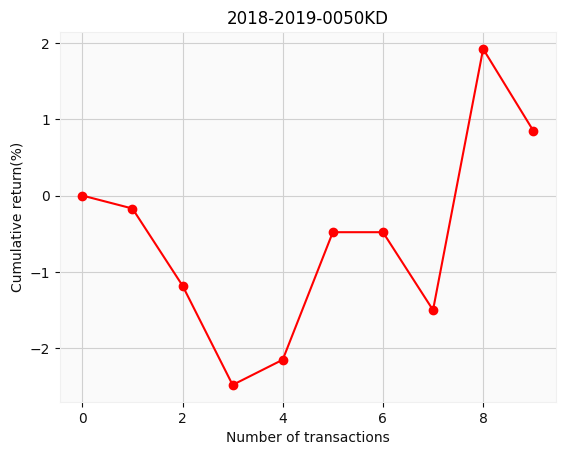

In [ ]:
plt.title("2018-2019-0050KD")
plt.ylabel("Cumulative return(%)")
plt.xlabel("Number of transactions")
plt.plot(cum_return,"ro-")
plt.show()